<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [2]:
# Read CSV
wine_csv = '../../DATA/winequality_merged.csv'
wine_data = pd.read_csv(wine_csv)

#### 1.2 Explore Data (Exploratory Data Analysis)

In [3]:
# ANSWER
wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  red_wine  
0      9.4        5         1  
1      9.8        5         1  
2      9.8        5         1  
3      9.8        6         1  
4      9.4        5         1

In [5]:
# High level data check
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [9]:
# Summary statistics
wine_data.describe().T

count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   
red_wine              6497.0    0.246114   0.430779  0.00000   0.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000  
red_wine                0.00000    0.00000    1.00000

### 2. Set Target Variable

Create a target variable for wine quality.

In [10]:
# Target Variable
y = wine_data['quality']

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reasoning for the choices you make.

In [32]:
# Obtaining the list of all column names
column_names = wine_data.columns.to_list()
# Removing 'quality' from this list
column_names.remove('quality')
# Adding 'quality' back in as the 1st column
column_names.insert(0, 'quality')
# Changing column order to make 'quality' the first column
wine_data = wine_data.loc[:, column_names]
wine_data

quality  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           5            7.4              0.70         0.00             1.9   
1           5            7.8              0.88         0.00             2.6   
2           5            7.8              0.76         0.04             2.3   
3           6           11.2              0.28         0.56             1.9   
4           5            7.4              0.70         0.00             1.9   
...       ...            ...               ...          ...             ...   
6492        6            6.2              0.21         0.29             1.6   
6493        5            6.6              0.32         0.36             8.0   
6494        6            6.5              0.24         0.19             1.2   
6495        7            5.5              0.29         0.30             1.1   
6496        6            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700  3.26   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
6492      0.039                 24.0                  92.0  0.99114  3.27   
6493      0.047                 57.0                 168.0  0.99490  3.15   
6494      0.041                 30.0                 111.0  0.99254  2.99   
6495      0.022                 20.0                 110.0  0.98869  3.34   
6496      0.020                 22.0                  98.0  0.98941  3.26   

      sulphates  alcohol  red_wine  
0          0.56      9.4         1  
1          0.68      9.8         1  
2          0.65      9.8         1  
3          0.58      9.8         1  
4          0.56      9.4         1  
...         ...      ...       ...  
6492       0.50     11.2         0  
6493       0.46      9.6         0  
6494       0.46      9.4         0  
6495       0.38     12.8         0  
6496       0.32     11.8         0  

[6497 rows x 13 columns]

D:\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

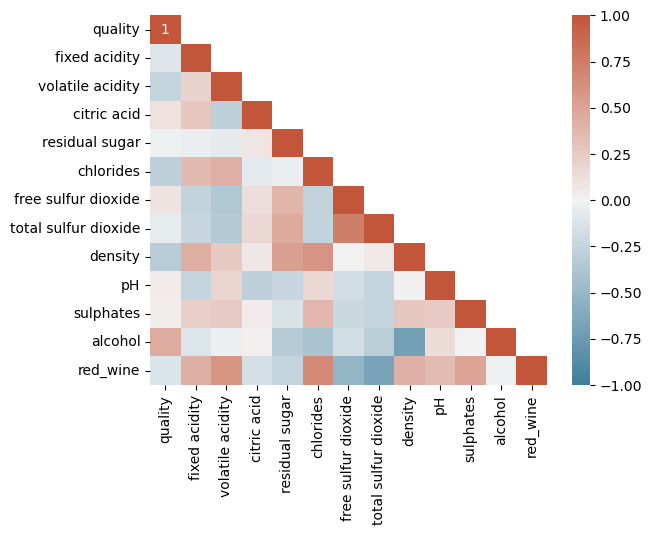

In [33]:
# ANSWER
# Examining correlation of the features
corr = wine_data.corr(method='spearman')

# Create a mask to hide the upper triangle of the heatmap
mask = np.tril(np.ones_like(corr, dtype=bool))

# Creating color map for the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Visualing the correlatin matrix using heatmap
sns.heatmap(corr, cmap=cmap, mask=~mask, vmax=1, vmin=-1, annot=True, square=False, annot_kws={"size": 10})

After examining the correlation matrix of the features, the following features can be considered as the predictors of the model: 'volatile acidity', 'chlorides', 'density', and 'alcohol'.
- 'volatile acidity'
- 'chlorides'
- 'density'
- 'alcohol'

In [40]:
X = wine_data[['volatile acidity', 'chlorides', 'density', 'alcohol']]

### 4. Using Linear Regression Create a Model and Test Score

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
# Create a model for Linear Regression
linreg = LinearRegression()
# Fit the model with the Training data
linreg.fit(X_train, y_train)
# Calculate the score (R^2 for Regression) for Training Data
print(f'R^2 for training data = {linreg.score(X_train, y_train)}')
# Calculate the score (R^2 for Regression) for Testing Data
print(f'R^2 for testing data = {linreg.score(X_test, y_test)}')

R^2 for training data = 0.2707886547599645
R^2 for testing data = 0.2521354751304964


## BONUS: Cross validation

In [43]:
# Cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [45]:
# Set up 5-fold cross validation
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):

    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    # Fit model with training set
    linreg.fit(X_train, y_train)
    # Make predictions with training and test set
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(linreg.score(X_train, y_train))
    test_scores.append(linreg.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, y_hat_train, squared=False))
    test_rmse.append(mean_squared_error(y_test, y_hat_test, squared=False))
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Train R^2 score': train_scores 
                          , 'Test R^2 score': test_scores
                          , 'Train RMSE': train_rmse
                          , 'Test RMSE': test_rmse})
metrics_df

Train R^2 score  Test R^2 score  Train RMSE  Test RMSE
0         0.269476        0.256143    0.758093   0.703364
1         0.264942        0.275865    0.748109   0.744877
2         0.271559        0.248725    0.741949   0.769431
3         0.269068        0.259583    0.740985   0.772847
4         0.262521        0.285106    0.747248   0.748490

In [47]:
# Describe the metrics
metrics_df.describe().T

count      mean       std       min       25%       50%  \
Train R^2 score    5.0  0.267513  0.003680  0.262521  0.264942  0.269068   
Test R^2 score     5.0  0.265084  0.014958  0.248725  0.256143  0.259583   
Train RMSE         5.0  0.747277  0.006813  0.740985  0.741949  0.747248   
Test RMSE          5.0  0.747802  0.027743  0.703364  0.744877  0.748490   

                      75%       max  
Train R^2 score  0.269476  0.271559  
Test R^2 score   0.275865  0.285106  
Train RMSE       0.748109  0.758093  
Test RMSE        0.769431  0.772847

In [49]:
# Average perfomance of the model
print(f'R^2 score of the model = {np.mean(test_scores)}')
print(f'\nRMSE of the model = {np.mean(test_rmse)}')

R^2 score of the model = 0.26508424284758364

RMSE of the model = 0.7478019626786445


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data?

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**

In [50]:
print(f'R^2 score of the model = {np.mean(test_scores)}')

R^2 score of the model = 0.26508424284758364


I've selected 4 features for the model after examining the correlation values. But we might be able to improve the model by selecting more features

In [51]:
# Code below is copied from the lab answer
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = alcohol, density, volatile acidity, chlorides
(Step) Trying alcohol...
(Step) - Features = alcohol
(Step) - Adjusted R^2: This = 0.190; Best = 0.000
(Step) - New Best!   : Feature = alcohol; R^2 = 0.190; Adjusted R^2 = 0.190
(Step) Trying density...
(Step) - Features = density
(Step) - Adjusted R^2: This = 0.093; Best = 0.190
(Step) Trying volatile acidity...
(Step) - Features = volatile acidity
(Step) - Adjusted R^2: This = 0.074; Best = 0.190
(Step) Trying chlorides...
(Step) - Features = chlorides
(Step) - Adjusted R^2: This = 0.041; Best = 0.190
Added feature alcohol with R^2 = 0.190 and adjusted R^2 = 0.190

(Step) Excluded = density, volatile acidity, chlorides
(Step) Trying density...
(Step) - Features = alcohol, density
(Step) - Adjusted R^2: This = 0.190; Best = 0.190
(Step) Trying volatile acidity...
(Step) - Features = alcohol, volatile acidity
(Step) - Adjusted R^2: This = 0.253; Best = 0.190
(Step) - New Best!   : Feature = volatile acidity; R^2 = 0.254;



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



